#Trabalho Final - Operações básicas em DL via Keras (Base Fashion_MNIST)



In [0]:
import keras
from keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
%matplotlib inline
from random import randint
from keras.models import Sequential

Using TensorFlow backend.


### 1. Separando os datsets de treinamento e teste

In [0]:
# Configurar nossos sets de treinamento e teste
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_test_ori = x_test
y_test_ori = y_test
x_train_ori = x_train
y_train_ori = y_train

4423680/4422102 [==============================] - 1s 0us/step


### 2. Visualizando uma imagem aleatória do dataset

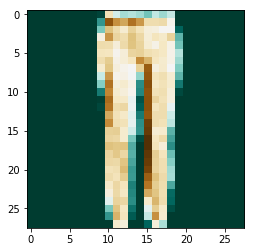

In [0]:
pyplot.imshow(x_train[randint(0, x_train.shape[0])], cmap='BrBG_r'); #Testar com outros itens - só mudar o cmap - cmaps possíveis: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r e +

### 3. Convertendo os dados de entrada

In [0]:


# Redefinindo as dimensões de entrada para garantir que a convolução funcione

img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [0]:
# Convertendo vetores de classes em matrizes de classe binária

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### 4. Modelos de redes neurais

### Teste 1 - 2 camadas convolucionais e 2 camadas densas

In [0]:
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [0]:
# Definindo nosso modelo

model = Sequential()
model.add(Conv2D(32, 
         kernel_size=(3, 3),
         activation='relu',
         input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# Definindo nosso treinamento

training = model.fit(x_train, 
                     y_train,
                     epochs=1,
                     verbose=True, 
                     validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 13s 248us/step - loss: 12.5880 - acc: 0.2187 - val_loss: 12.9992 - val_acc: 0.1935


In [0]:
loss, accuracy = model.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 1s 59us/step
Test loss: 12.9
Test accuracy: 19.750%


A acurácia ficou muito baixa, na amostra de teste obteve apenas <b>19,75%</b>
<br>
<br>

### Teste 2 - Apenas com 2 camadas densas

In [0]:
#modelo 2
model2 = Sequential()
model2.add(Flatten(input_shape=input_shape))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
training2 = model2.fit(x_train, 
                     y_train,
                     epochs=5,
                     batch_size=128,
                     verbose=True, 
                     validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 2s 29us/step - loss: 10.7003 - acc: 0.3346 - val_loss: 10.3415 - val_acc: 0.3578
Epoch 2/5
54000/54000 [==============================] - 1s 25us/step - loss: 10.4607 - acc: 0.3502 - val_loss: 10.2506 - val_acc: 0.3630
Epoch 3/5
54000/54000 [==============================] - 1s 25us/step - loss: 10.2344 - acc: 0.3645 - val_loss: 10.3679 - val_acc: 0.3557
Epoch 4/5
54000/54000 [==============================] - 1s 25us/step - loss: 10.3355 - acc: 0.3583 - val_loss: 10.6321 - val_acc: 0.3402
Epoch 5/5
54000/54000 [==============================] - 1s 27us/step - loss: 10.2108 - acc: 0.3661 - val_loss: 10.1360 - val_acc: 0.3710


In [0]:
loss, accuracy = model2.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 0s 38us/step
Test loss: 10.2
Test accuracy: 36.900%


Apesar de ainda não ter alcançado um valor significativo, a acurácia na amostra de teste aumentou para <b>36,90%</b>.
<br>
<br>

### Teste 3 - Utilizando o modelo mais simples (Modelo 2) com normalização dos dados de entrada

In [0]:
# normaliza as imagens em escala de cinza
x_train_pb = x_train / 255.0
x_test_pb = x_test / 255.0

In [0]:
#modelo 3
model3 = Sequential()
model3.add(Flatten(input_shape=input_shape))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model3.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
training3 = model3.fit(x_train_pb, 
                     y_train,
                     epochs=10,
                     batch_size=128,
                     verbose=True, 
                     validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 77us/step - loss: 0.5730 - acc: 0.8040 - val_loss: 0.4347 - val_acc: 0.8493
Epoch 2/10
54000/54000 [==============================] - 1s 28us/step - loss: 0.4141 - acc: 0.8565 - val_loss: 0.4098 - val_acc: 0.8538
Epoch 3/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.3742 - acc: 0.8666 - val_loss: 0.3721 - val_acc: 0.8643
Epoch 4/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.3448 - acc: 0.8771 - val_loss: 0.3639 - val_acc: 0.8702
Epoch 5/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.3225 - acc: 0.8843 - val_loss: 0.3501 - val_acc: 0.8743
Epoch 6/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.3126 - acc: 0.8881 - val_loss: 0.3565 - val_acc: 0.8725
Epoch 7/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.

In [0]:
loss, accuracy = model3.evaluate(x_test_pb, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 0s 40us/step
Test loss: 0.35
Test accuracy: 87.780%


Essa simples transformação fez com que o modelo apresentasse uma incrível melhoria, a acurácia obtida na amostra de teste atingiu o patamar de <b>87,78%<br>

### Teste 4 - Utilizando o modelo do teste 3 com alteração do otimizador de adam para rmsprop

In [0]:
#modelo 4
model4 = Sequential()
model4.add(Flatten(input_shape=input_shape))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(10, activation='softmax'))

In [0]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model4.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
training4 = model4.fit(x_train_pb, 
                     y_train,
                     epochs=10,
                     batch_size=128,
                     verbose=True, 
                     validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 32us/step - loss: 0.5942 - acc: 0.7943 - val_loss: 0.4502 - val_acc: 0.8367
Epoch 2/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.4197 - acc: 0.8509 - val_loss: 0.4294 - val_acc: 0.8423
Epoch 3/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.3730 - acc: 0.8661 - val_loss: 0.3777 - val_acc: 0.8592
Epoch 4/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.3424 - acc: 0.8761 - val_loss: 0.3439 - val_acc: 0.8782
Epoch 5/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.3222 - acc: 0.8835 - val_loss: 0.3373 - val_acc: 0.8782
Epoch 6/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.3052 - acc: 0.8892 - val_loss: 0.3355 - val_acc: 0.8793
Epoch 7/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.2917 - acc: 0.8932 - val_loss: 0.3301 - val_acc:

In [0]:
loss, accuracy = model4.evaluate(x_test_pb, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 0s 44us/step
Test loss: 0.366
Test accuracy: 87.190%


Com o otimizador Adam o resultado foi superior. Aqui a acurácia obtida foi de <b>87,19%</b>

### Teste 5 - Com uma amostra maior de treinamento e menor de validação

In [0]:
#modelo 5
model5 = Sequential()
model5.add(Flatten(input_shape=input_shape))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(10, activation='softmax'))

In [0]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model5.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
training5 = model5.fit(x_train_pb, 
                     y_train,
                     epochs=10,
                     batch_size=128,
                     verbose=True, 
                     validation_split=0.05)

Train on 57000 samples, validate on 3000 samples
Epoch 1/10
57000/57000 [==============================] - 2s 33us/step - loss: 0.5660 - acc: 0.8046 - val_loss: 0.4368 - val_acc: 0.8467
Epoch 2/10
57000/57000 [==============================] - 2s 27us/step - loss: 0.4097 - acc: 0.8563 - val_loss: 0.3897 - val_acc: 0.8627
Epoch 3/10
57000/57000 [==============================] - 2s 27us/step - loss: 0.3679 - acc: 0.8697 - val_loss: 0.3501 - val_acc: 0.8710
Epoch 4/10
57000/57000 [==============================] - 2s 28us/step - loss: 0.3362 - acc: 0.8796 - val_loss: 0.3369 - val_acc: 0.8757
Epoch 5/10
57000/57000 [==============================] - 2s 27us/step - loss: 0.3188 - acc: 0.8846 - val_loss: 0.3429 - val_acc: 0.8750
Epoch 6/10
57000/57000 [==============================] - 2s 27us/step - loss: 0.3004 - acc: 0.8919 - val_loss: 0.3278 - val_acc: 0.8790
Epoch 7/10
57000/57000 [==============================] - 2s 27us/step - loss: 0.2865 - acc: 0.8965 - val_loss: 0.3097 - val_acc:

In [0]:
loss, accuracy = model5.evaluate(x_test_pb, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 0s 40us/step
Test loss: 0.334
Test accuracy: 88.240%


Conforme esperado, há um aumento da acurácia devido a utilização de mais exemplares no treinamento. Acurácia obtida = <b>88,24%</b>

### Teste 6 - Com maiores amostras de treinamento e validação e menor de teste

In [0]:
import numpy as np 

x_train2 = x_train_ori
y_train2 = y_train_ori
x_test2 = x_test_ori
y_test2 = y_test_ori



(x_extr_test2,x_test2) = x_test2[5000:],x_test2[:5000] 
(y_extr_test2,y_test2) = y_test2[5000:],y_test2[:5000] 


x_train2 = np.concatenate((x_train2,x_extr_test2),axis=0)
y_train2 = np.concatenate((y_train2,y_extr_test2),axis=0)


# Definindo nosso modelo de CNN

# Redefinindo as dimensões de entrada para garantir que a convolução funcione

img_rows, img_cols = 28, 28
x_train2 = x_train2.reshape(x_train2.shape[0], img_rows, img_cols, 1)
x_test2 = x_test2.reshape(x_test2.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)



# Convertendo vetores de classes em matrizes de classe binária

y_train2 = keras.utils.to_categorical(y_train2, 10)
y_test2 = keras.utils.to_categorical(y_test2, 10)


# normaliza as imagens em escala de cinza
x_train2_pb = x_train2 / 255.0
x_test2_pb = x_test2 / 255.0


# impressão do número de imagens nos datasets de treinamento, teste e validação
print(x_train2.shape[0], 'train samples')
print(x_test2.shape[0], 'test samples')


65000 train samples
5000 test samples


In [0]:
#modelo 6
model6 = Sequential()
model6.add(Flatten(input_shape=input_shape))
model6.add(Dense(128, activation='relu'))
model6.add(Dense(10, activation='softmax'))

In [0]:
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model6.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
training6 = model6.fit(x_train2_pb, 
                     y_train2,
                     epochs=10,
                     batch_size=128,
                     verbose=True, 
                     validation_split=0.1)

Train on 58500 samples, validate on 6500 samples
Epoch 1/10
58500/58500 [==============================] - 2s 35us/step - loss: 0.5661 - acc: 0.8053 - val_loss: 0.5146 - val_acc: 0.8085
Epoch 2/10
58500/58500 [==============================] - 2s 29us/step - loss: 0.4169 - acc: 0.8548 - val_loss: 0.4493 - val_acc: 0.8358
Epoch 3/10
58500/58500 [==============================] - 2s 29us/step - loss: 0.3714 - acc: 0.8691 - val_loss: 0.3926 - val_acc: 0.8634
Epoch 4/10
58500/58500 [==============================] - 2s 28us/step - loss: 0.3444 - acc: 0.8776 - val_loss: 0.4054 - val_acc: 0.8460
Epoch 5/10
58500/58500 [==============================] - 2s 28us/step - loss: 0.3244 - acc: 0.8838 - val_loss: 0.3693 - val_acc: 0.8712
Epoch 6/10
58500/58500 [==============================] - 2s 28us/step - loss: 0.3104 - acc: 0.8864 - val_loss: 0.3744 - val_acc: 0.8686
Epoch 7/10
58500/58500 [==============================] - 2s 28us/step - loss: 0.3029 - acc: 0.8902 - val_loss: 0.3649 - val_acc:

In [0]:
loss, accuracy = model6.evaluate(x_test2_pb, 
                                y_test2, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

5000/5000 [==============================] - 0s 46us/step
Test loss: 0.349
Test accuracy: 87.480%


Aqui não ocorreu o mesmo efeito, apesar o aumento das amostras de treinamento e validação, não foram suficientes para aumentar a acurácia, chegando a <b>87,48%</b>
<br>
<br>

<br>
<br>
# O melhor resultado obtido foi no Teste 3 com uma acurácia de 87,78%
<br>
<br>

### 5. Testes de predição com o melhor modelo

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
# obtendo previsões no conjunto de testes
y_hat = model3.predict(x_test_pb)

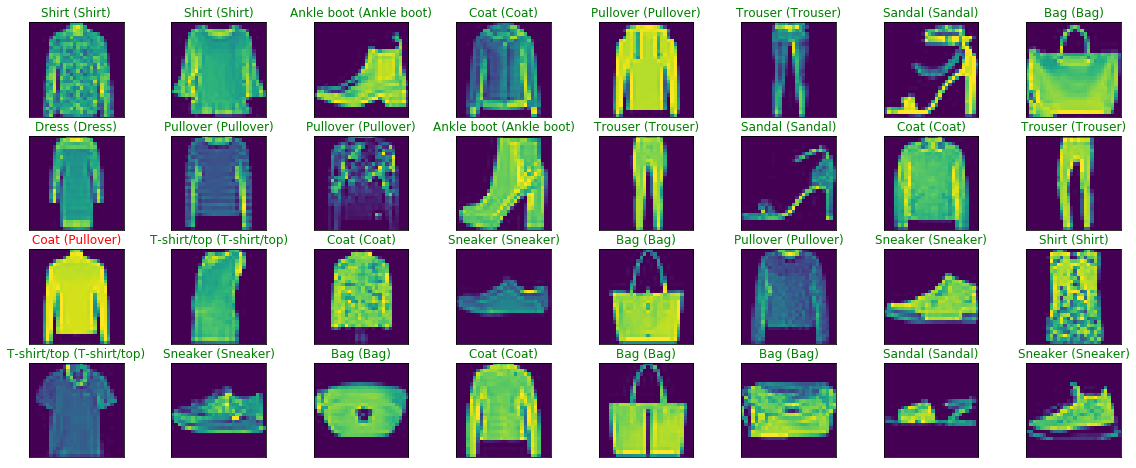

In [0]:
import numpy as np 

# plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10
fig = pyplot.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test_ori.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test_ori[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx=y_test_ori[idx]
    ax.set_title("{} ({})".format(class_names[pred_idx], class_names[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho


### 6. Verificando a existência de overfitting ou underfitting durante o treinamento

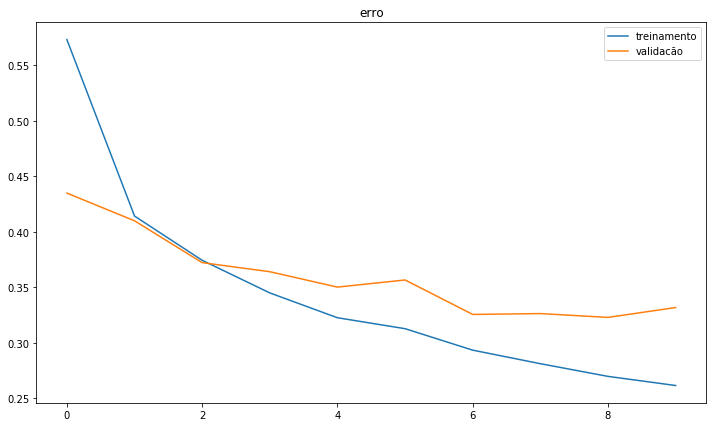

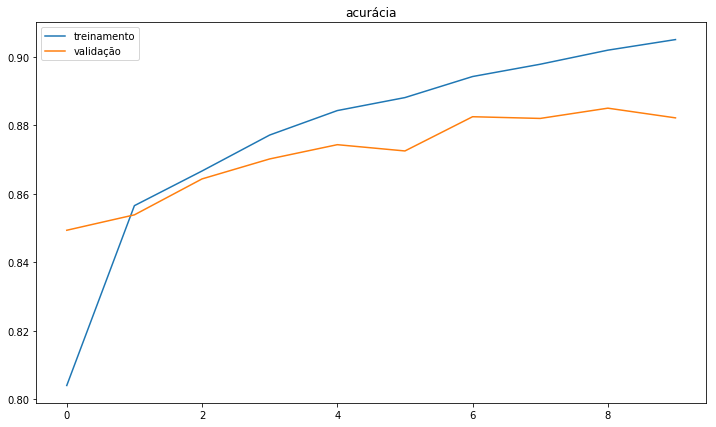

In [0]:
plt.figure(figsize=(12,7))
plt.plot(training3.epoch,training3.history['loss'], label='treinamento')
plt.plot(training3.epoch,training3.history['val_loss'], label='validacão')
plt.title('erro')
plt.legend(loc='best')

plt.figure(figsize=(12,7))
plt.plot(training3.epoch,training3.history['acc'], label='treinamento')
plt.plot(training3.epoch,training3.history['val_acc'], label='validação')
plt.title('acurácia')
plt.legend(loc='best')

<br>
### A partir dos gráficos acima que mostram o comportamento do erro/perda nas amostras de treinamento e validação e o gráfico que mostra a acurácia nas mesmas amostras percebe-se:
* O comportamento do erro/perda nas amostras de treinamento e validação são bem distintas. A partir da época 4, enquanto o erro segue diminuindo na amostra de treinamento, na amostra de validação ele aumenta um pouco para depois praticamente se estabilizar
* A observação similar pode ser percebida em relação a acurácia, equanto ela aumenta até a época 4 em ambas as amostras, após esse marco ela diminui um pouco na amostra de validação e praticamente se estabiliza depois. Na amostra de treinamento ocorre uma melhoria continua. 
<br>
### Pelas observações mencionadas acima, há claros indícios de overfitting do modelo.
<br>
### Percebe-se que há um underfitting até a época 4, sendo que após esse momento, ocorre o overfitting do modelo
<br>
<br>

### 7. Ações para melhorar a acurácia do modelo

* Como a rede rapidamente atingiu um estágio de overfitting, não há grandes melhoras na acurácia a serem alcançadas com a arquitetura utilizada

* Desse modo, não adiantaria regular a learning rate e nem aumentar a quantidade de épocas

* Deveria haver testes para utilizar mais camadas convolucionais com a utilização de filtros e taxas de dropout

* Utilizar mais transformações nas imagens, do tipo Data Augmentation

* Utilizar outras arquiteturas de redes convolucionais, tais como a ResNet, VGG, GoogleNet/Inception, nos testes.

* Utilização de ensemble de modelos para compor fortalezas de várias arquiteturas na análise de uma imagem
